# ADULT DATASET

The information is a replica of the notes for the abalone dataset from the UCI repository.
<ul>
<li><b> Title of Database</b>: <b>adult</b></li>
<li> <b>Sources:</b></li>
(a) Original owners of database (name/phone/snail address/email address)
US Census Bureau.<br>
(b) Donor of database (name/phone/snail address/email address)<br>
Ronny Kohavi and Barry Becker, <br>
Data Mining and Visualization <br>
Silicon Graphics.<br> 
e-mail: ronnyk@sgi.com <br>
(c) Date received (databases may change over time without name change!)
05/19/96<br>
(a) Complete reference of article where it was described/used<br>
@inproceedings{kohavi-nbtree, 
author={Ron Kohavi}, <br>
<li><b> Number of Instances</b></li>
<ol>
<li>48842 instances, mix of continuous and discrete (train=32561, test=16281)</li>
<li>45222 if instances with unknown values are removed (train=30162, test=15060)</li>
<li>Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).</li>
</ol>
<li><b> Number of Attributes</b></li>
6 continuous<br> 8 nominal attributes.

<li><b>Attribute Information:</b></li>
<ol>    
<li><b>age</b>: continuous.</li>
<li><b>workclass:</b> Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</li>
fnlwgt: continuous.</li>
<li><b>education:</b> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</li>
<li><b>education-num:</b> continuous.</li>
<li><b>marital-status:</b> Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</li>
<li><b>occupation:</b> Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</li>
<li><b>relationship:</b> Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</li>
<li><b>race:</b> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</li>
<li><b>sex: </b>Female, Male.</li>
<li><b>capital-gain:</b> continuous.</li>
<li><b>capital-loss:</b> continuous.</li>
<li><b>hours-per-week:</b> continuous.</li>
<li><b>native-country:</b> United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.</li>
</ol>
    <b>class:</b> >50K, <=50K<br>
<li><b> Missing Attribute Values:</b>
7% have missing values.<br>
<li><b>Class Distribution:</b></li>
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns) <br>
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) <br>
<li><b>Notes for Delve</b></li>
One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.<br>
Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.<br>
The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.<br>
</ul>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<h3>Import the libraries</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


<h3> Load the data</h3>

In [3]:
miss_val=['?']
adult_df=pd.read_csv('test/adult.csv',na_values=miss_val)
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


<h1>Cleaning the data</h1>

<h3>Shape of data</h3>

In [4]:
adult_df.shape

(48842, 15)

<h3>Rows with any missing value</h3>

In [5]:
adult_df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

<h3>Number of rows with any missing value</h3>

In [6]:
adult_df.isnull().any(axis=1).sum()

3620

<h3>Removing all the missing vlue by removing rows</h3>

In [7]:
adult_df=adult_df[adult_df.isnull().sum(axis=1)<1]

<h3>Checking the number of rows which contains missing values</h3>

In [8]:
adult_df.isnull().any(axis=1).sum()

0

<h3>Percentage of rows that were removed while handling missing values</h3>

In [10]:
print((1-len(adult_df.index)/48842)*100,'%')

7.411653904426519 %


<ul><li>THere are 7.41% of rows are removed</li>
</ul>

<h3>Numerical description of data</h3>

In [11]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<h4>Observation</h4>
<ul>
<li><b>Age</b></li>
<ol>
<li>This contains age of an indivividual</li>
<li>The mean value of age is 38 and median is 37</li>
<li>The value of age lies from 17 to 90</li>
</ol>
<li><b>Educational-num</b></li>
<ol>
<li>This attributes contains the age of an individual</li>
<li>The mean is 10.11 and median is 10</li>
</ol>
<li><b>Capital-gain</b></li>
<ol>
<li>The mean is 1101.43 and median is 0</li>
<li>This shows some has high profit or not at all profit.</li>
</ol>
<li><b>Capital-loss</b></li>
<ol>
<li>The mean is 88.59and median is 0</li>
<li>This varies from 0 to 4356</li>
</ol>
<li><b>Hours-per-week</b></li>
<ol>
<li>The mean is 40.93 and median is 40.</li>
<li>THe values lies between 1 to 99</li>
</ol>
</ul>

<h2>Data Preparation</h2>

<ul>
<li>Consider income as target variable</li>
<li>Remove unneccessary columns</li>
<li>Standardizing numerical columns</li>
<li>Encoding categorical columns</li>
<li>Train Test Split</li>
</ul>

<h3>Removing the fnlwgt column</h3>

In [12]:
adult_df.drop(['fnlwgt'],axis=1,inplace=True)

In [13]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.6+ MB


In [14]:
Target = adult_df.income
data = adult_df.drop('income',axis=1)

<h3>Standardization numerical data</h3>

In [15]:
numerical=adult_df.select_dtypes(include=['int64','float64'])
numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
adult_num=pd.DataFrame(scaler.fit_transform(numerical),columns=numerical.columns)
adult_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


<h3>Encoding the categorical features</h3>

In [17]:
categorical=adult_df.select_dtypes(include=['object'])
categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
adult_cat=pd.DataFrame(encoder.fit_transform(categorical),columns=encoder.get_feature_names(categorical.columns))
adult_cat.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
adult_df=pd.concat([adult_num,adult_cat], axis=1)
adult_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<h3>Train Test Split</h3>

In [62]:
Target=adult_df.pop('income_>50K')
data=adult_df
from sklearn.model_selection import train_test_split

data_train,data_test,Target_train,Target_test=train_test_split(data,Target,test_size=0.25,random_state=100)

<h4>Shape of Train Test</h4>

In [63]:
print(data_train.shape,Target_train.shape)
print(data_test.shape,Target_test.shape)

(33916, 103) (33916,)
(11306, 103) (11306,)


<h2>Train the model based on Training Data</h2>

<ul>
<li>Consider income as target variable</li>
<li>Using logistic Regression since task is of classification</li>
</ul>

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression( max_iter=250)
lr.fit(data_train,Target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<h3>Predict on Test Data</h3>

In [66]:
Target_pred = lr.predict(data_test)

<h3>Evaluate each model</h3>

In [67]:
from sklearn import metrics
metrics.accuracy_score(Target_test,Target_pred)

0.8513178843092164

<b> The accuracy of model is 85.13% </b>

<h3> Classification Report</h3>

In [68]:
print(metrics.classification_report(Target_test,Target_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      8515
         1.0       0.74      0.61      0.67      2791

    accuracy                           0.85     11306
   macro avg       0.81      0.77      0.79     11306
weighted avg       0.85      0.85      0.85     11306



<h3>Confusion Metric</h3>

In [69]:
con_metric = metrics.confusion_matrix(Target_test,Target_pred)
con_metric

array([[7931,  584],
       [1097, 1694]], dtype=int64)

<h2> Using of RFE to extract the best features</h2>

<ul>
<li>Build logistic Regression using thr best features</li>
<li>Test and Evaluate the new model</li>
</ul>

In [70]:
from sklearn.feature_selection import RFE
lr_temp = LogisticRegression( max_iter=250)
## No. of features taking = 30
rfe = RFE(lr_temp, 30)
rfe = rfe.fit(data_train, Target_train)
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=250,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=30, step=1, verbose=0)

In [71]:
ad_df = pd.DataFrame({'Columns' : data_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
ad_df

,Columns,Included,Ranking
0,age,False,26
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,35
4,hours-per-week,False,23
...,...,...,...
98,native-country_Thailand,False,6
99,native-country_Trinadad&Tobago,True,1
100,native-country_United-States,False,40
101,native-country_Vietnam,True,1


In [72]:
extract_col = data_train.columns[rfe.support_]
extract_col

Index(['educational-num', 'capital-gain', 'education_1st-4th',
       'education_5th-6th', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'gender_Female',
       'native-country_Cambodia', 'native-country_Canada',
       'native-country_Columbia', 'native-country_Dominican-Republic',
       'native-country_El-Salvador', 'native-country_France',
       'native-country_Guatemala', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Peru',
       'native-country_Scotland', 'native-country_South',
       'native-country_Trinadad&Tobago', 'native-country_Vietnam'],
      dtype='object')

In [73]:
#Extract col for train data
data_train_new = data_train[extract_col]
data_train_new

,educational-num,capital-gain,education_1st-4th,education_5th-6th,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,native-country_El-Salvador,native-country_France,native-country_Guatemala,native-country_Laos,native-country_Mexico,native-country_Peru,native-country_Scotland,native-country_South,native-country_Trinadad&Tobago,native-country_Vietnam
4391,-2.004996,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42047,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18562,-0.438122,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37936,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32942,1.520471,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,-1.613277,-0.146733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,-0.046403,-0.146733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12119,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14147,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Applying the best feature to Train the model on Training Data</h3>

In [74]:
lre = LogisticRegression(max_iter=250)
lre.fit(data_train_new, Target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<h3>Predict the model</h3>

In [75]:
Target_predict_new = lre.predict(data_train_new)
Target_predict_new

array([0., 1., 0., ..., 0., 0., 0.])

<h3> Accuracy of model</h3>

In [92]:
from sklearn import metrics
metrics.accuracy_score(Target_test,Target_pred)

0.8513178843092164

<b>Accuracy using RFE is 85.13% </b>

<h1> Use of PCA to extract best features</h1>

<ul>
<li>Since task is classification use logistic regression,knn,DT,SVM</li>
<li>Test and evaluate each model</li>
</ul>

In [77]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(data)
np.cumsum(pca.explained_variance_ratio_)

array([0.16768198, 0.2879051 , 0.39762966, 0.49547843, 0.58648356,
       0.65291461, 0.68497618, 0.71235661, 0.7364122 , 0.7568259 ,
       0.77502832, 0.79256821, 0.80817482, 0.8225488 , 0.83551933,
       0.84786611, 0.85964318, 0.86948022, 0.87907971, 0.88808081,
       0.89649447, 0.90430647, 0.91097862, 0.91699583, 0.92263253,
       0.92802132, 0.93293231, 0.93767337, 0.94229843, 0.94641342,
       0.95024363, 0.95399398, 0.95762487, 0.96116778, 0.96461512,
       0.96800055, 0.97099816, 0.97390178, 0.9764641 , 0.97859956,
       0.98058483, 0.98233325, 0.98392882, 0.98541039, 0.98687262,
       0.98826802, 0.98960184, 0.99059305, 0.99148621, 0.99210272,
       0.99266784, 0.99321898, 0.99365751, 0.99405449, 0.99441742,
       0.99477726, 0.99510485, 0.99542717, 0.99572397, 0.99598941,
       0.99624212, 0.99647777, 0.99670588, 0.99692585, 0.99713912,
       0.99734717, 0.99754987, 0.99774546, 0.99793646, 0.9981051 ,
       0.99826175, 0.9984105 , 0.99854574, 0.99867085, 0.99878

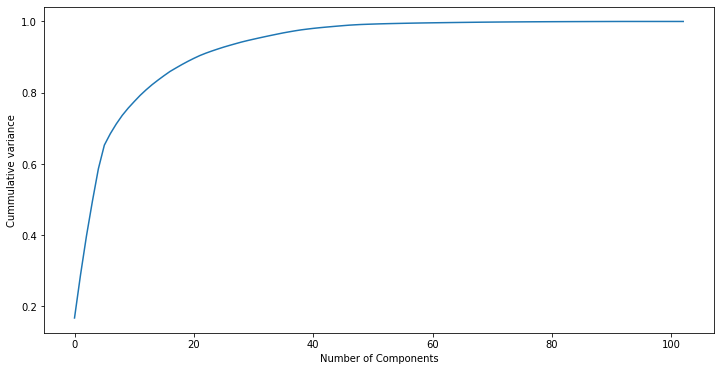

In [78]:
plt.figure(figsize = (12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()


In [79]:
pca = PCA(n_components=42,whiten=True)
data_PCA = pca.fit_transform(data)
data_PCA

array([[-1.24432678e+00, -1.76924519e-01,  1.34680836e-01, ...,
        -2.83927157e-01, -7.17802978e-01, -3.57326429e-01],
       [ 3.81957512e-01, -7.71029118e-01,  1.67684035e-01, ...,
        -9.81163924e-01,  1.35829026e-01, -8.93457165e-02],
       [ 2.71506554e-01,  5.45797099e-01, -5.02864772e-02, ...,
         5.14628500e+00, -1.28910528e+00,  1.24396823e-02],
       ...,
       [-1.40381657e-02, -9.90593007e-01,  2.79946680e-01, ...,
         2.90600994e-01, -1.56934740e-01,  2.33441009e-01],
       [-1.72424162e+00,  4.02119811e-01,  4.25940939e-02, ...,
         1.56360581e-01,  7.50568557e-02, -1.82208086e-02],
       [ 6.70393604e-01, -3.68766584e-01,  1.38712898e+00, ...,
         5.83945456e-01, -6.98099600e-01, -5.11629385e-03]])

<h2>Train Test Split on the best features :-</h2>

In [80]:
x_train, x_test, y_train, y_test = train_test_split(data_PCA[:], Target, test_size=.30, random_state=25)

<h2>Logistic Regression</h2>


In [81]:
logistic = LogisticRegression(max_iter = 250)
logistic.fit(x_train,y_train)
#Predict the test data
y_predict_logistic = logistic.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_logistic)))

print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_logistic))

print('Classification Report :')
print(classification_report(y_test,y_predict_logistic))

Accuracy score : 0.848603228421906
Confusion matrix :
[[9472  688]
 [1366 2041]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10160
         1.0       0.75      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

<h2>Support vector machine </h2>

In [84]:
svm = svm.SVC()
svm.fit(x_train,y_train)
#Predict the test data
y_predict_svm = svm.predict(x_test)

In [85]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_svm)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_svm))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_svm))

Accuracy score : 0.8508881845654898


Confusion matrix :
[[9516  644]
 [1379 2028]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     10160
         1.0       0.76      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.82      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



<h2>KNeighborsClassifier</h2>

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
#Predict the test data
y_predict_knn = knn.predict(x_test)

In [87]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_knn)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_knn))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_knn))

Accuracy score : 0.814402594530847


Confusion matrix :
[[9059 1101]
 [1417 1990]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88     10160
         1.0       0.64      0.58      0.61      3407

    accuracy                           0.81     13567
   macro avg       0.75      0.74      0.75     13567
weighted avg       0.81      0.81      0.81     13567



<h2> Decision Tree Classifier </h2>

In [88]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
#Predict the test data
y_predict_dtc = dtc.predict(x_test)

In [89]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_dtc)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_dtc))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_dtc))

Accuracy score : 0.8015773568216997


Confusion matrix :
[[8875 1285]
 [1407 2000]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     10160
         1.0       0.61      0.59      0.60      3407

    accuracy                           0.80     13567
   macro avg       0.74      0.73      0.73     13567
weighted avg       0.80      0.80      0.80     13567



<h3>Observation :-</h3>
<ul>


<li>We can conclude that for Logistic Regression have highest Accuracy Score i.e. 84.8 %.</li>

<li>SVM accuracy score is very much near to Logistic Regression i.e. 85.09 %.</li>

<li>For KNeighborsClassifier the accuracy score is 81.59 %.</li>

<li>For DecisionTreeClassifier the accuracy score is 80.1 %.</li>
</ul>